In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('customer_churn.csv')

In [ ]:
data = pd.get_dummies(data)

In [ ]:
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
feature_importance = clf.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
print("Feature Importance:")
for i in sorted_indices:
    print(X.columns[i], ":", feature_importance[i])

Streaming output truncated to the last 5000 lines.
TotalCharges_7806.6 : 0.0
TotalCharges_7848.5 : 0.0
TotalCharges_7845.8 : 0.0
TotalCharges_7843.55 : 0.0
TotalCharges_7842.3 : 0.0
TotalCharges_7840.6 : 0.0
TotalCharges_784.45 : 0.0
TotalCharges_784.25 : 0.0
TotalCharges_7839.85 : 0.0
TotalCharges_781.4 : 0.0
TotalCharges_781.25 : 0.0
TotalCharges_7968.85 : 0.0
TotalCharges_797.1 : 0.0
TotalCharges_797.25 : 0.0
TotalCharges_81 : 0.0
TotalCharges_813.85 : 0.0
TotalCharges_813.45 : 0.0
TotalCharges_813.3 : 0.0
TotalCharges_8129.3 : 0.0
TotalCharges_8127.6 : 0.0
TotalCharges_8126.65 : 0.0
TotalCharges_8124.2 : 0.0
TotalCharges_812.5 : 0.0
TotalCharges_812.4 : 0.0
TotalCharges_811.8 : 0.0
TotalCharges_811.65 : 0.0
TotalCharges_8109.8 : 0.0
TotalCharges_8100.55 : 0.0
TotalCharges_8100.25 : 0.0
TotalCharges_810.85 : 0.0
TotalCharges_810.7 : 0.0
TotalCharges_810.45 : 0.0
TotalCharges_810.3 : 0.0
TotalCharges_810.2 : 0.0
TotalCharges_81.95 : 0.0
TotalCharges_81.7 : 0.0
TotalCharges_81.25 : 0.

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 1.0


In [ ]:
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
lr_accuracy = accuracy_score(y_test, lr_clf.predict(X_test))
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 1.0


In [ ]:
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


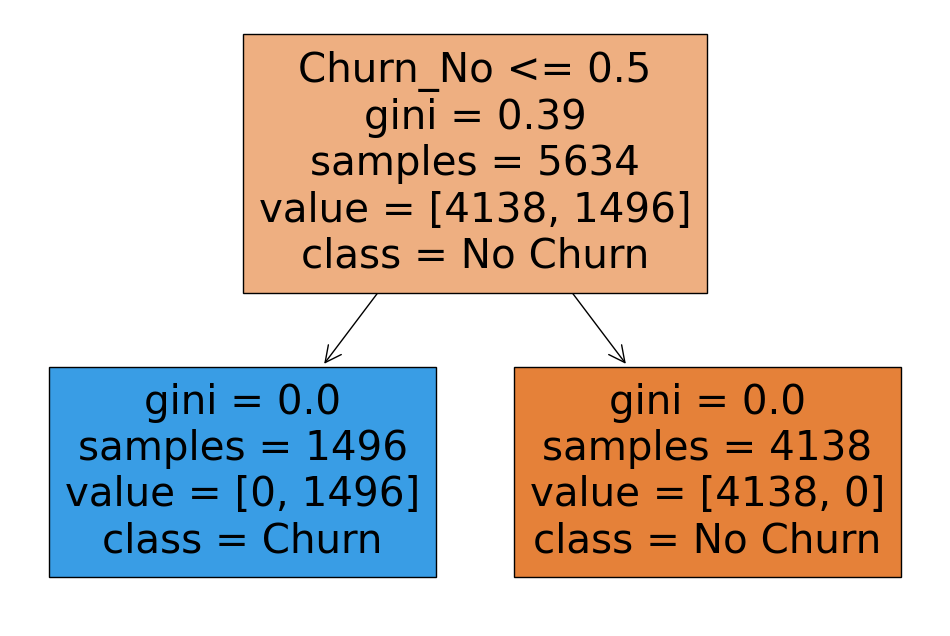

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Churn', 'Churn'])
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1036
        True       1.00      1.00      1.00       373

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



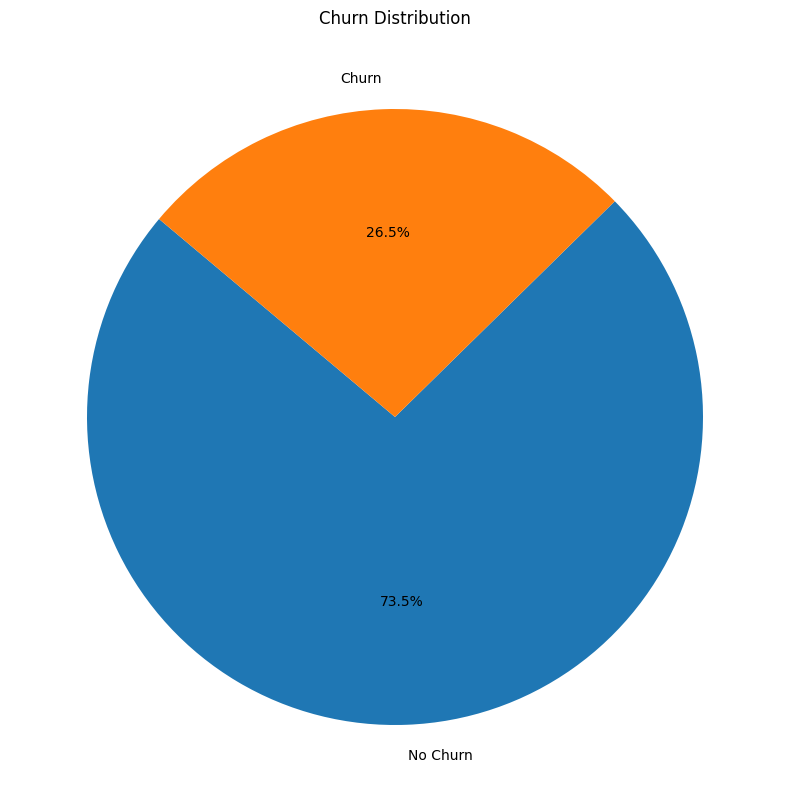

In [ ]:
churn_counts = data['Churn_Yes'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')
plt.show()

<Figure size 1200x800 with 0 Axes>

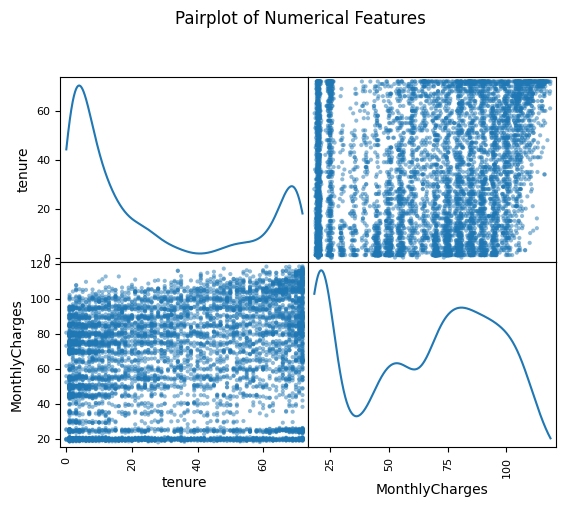

In [ ]:
plt.figure(figsize=(12, 8))
pd.plotting.scatter_matrix(data.select_dtypes(include=['float64', 'int64']), diagonal='kde', alpha=0.5)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()